In [1]:
########################## IMPORT LIBRARIES ##########################
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
from dicompylercore import dicomparser
import random

########################## LOAD FILES FOR PREPROCESSING ##########################
structureFiles = np.load('RT Simulation Structure File Paths.npy')

In [2]:
########################## IMAGE PREPROCESSING ##########################
stringTestingDirectory = "C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Image Preprocessing/Testing"

TestingFeaturesDict = {"3Class2Channel3Slice":stringTestingDirectory+"\Testing_Features_2D_3Class_2Channel_3Slice.npy",
                       "3Class3Channel3Slice":stringTestingDirectory+"\Testing_Features_2D_3Class_3Channel_3Slice.npy",
                       "3ClassRGB3Slice":stringTestingDirectory+"\Testing_Features_2D_3Class_RGB_3Slice.npy",
                       "5Class2Channel3Slice":stringTestingDirectory+"\Testing_Features_2D_5Class_2Channel_3Slice.npy",
                       "5Class3Channel3Slice":stringTestingDirectory+"\Testing_Features_2D_5Class_3Channel_3Slice.npy",
                      }

TestingLabelsDict = {"3Class2Channel3Slice":stringTestingDirectory+"\Testing_Label_2D_3Class_2Channel_3Slice.csv",
                     "3Class3Channel3Slice":stringTestingDirectory+"\Testing_Label_2D_3Class_3Channel_3Slice.csv",
                     "3ClassRGB3Slice":stringTestingDirectory+"\Testing_Label_2D_3Class_RGB_3Slice.csv",
                     "5Class2Channel3Slice":stringTestingDirectory+"\Testing_Label_2D_5Class_2Channel_3Slice.csv",
                     "5Class3Channel3Slice":stringTestingDirectory+"\Testing_Label_2D_5Class_3Channel_3Slice.csv",
                      }
stringTrainingDirectory = "C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Image Preprocessing/Training"
TrainingFeaturesDict = {"3Class2Channel3Slice":stringTrainingDirectory+"\Training_Features_2D_3Class_2Channel_3Slice.npy",
                        "3Class3Channel3Slice":stringTrainingDirectory+"\Training_Features_2D_3Class_3Channel_3Slice.npy",
                        "3ClassRGB3Slice":stringTrainingDirectory+"\Training_Features_2D_3Class_RGB_3Slice.npy",
                        "5Class2Channel3Slice":stringTrainingDirectory+"\Training_Features_2D_5Class_2Channel_3Slice.npy",
                        "5Class3Channel3Slice":stringTrainingDirectory+"\Training_Features_2D_5Class_3Channel_3Slice.npy",
                      }
TrainingLabelsDict = {"3Class2Channel3Slice":stringTrainingDirectory+"\Training_Label_2D_3Class_2Channel_3Slice.csv",
                      "3Class3Channel3Slice":stringTrainingDirectory+"\Training_Label_2D_3Class_3Channel_3Slice.csv",
                      "3ClassRGB3Slice":stringTrainingDirectory+"\Training_Label_2D_3Class_RGB_3Slice.csv",
                      "5Class2Channel3Slice":stringTrainingDirectory+"\Training_Label_2D_5Class_2Channel_3Slice.csv",
                      "5Class3Channel3Slice":stringTrainingDirectory+"\Training_Label_2D_5Class_3Channel_3Slice.csv",
                      }

In [ ]:
########################## DATA EXTRACTION ##############################

In [ ]:
########################## FIND AND SAVE RADIOPTHERPY FILE PATHS ##########################
import glob

allRTPaths = []
allRTPaths = glob.glob('D:/HNSCC/HNSCC-01-0???/??-??-????-RT SIMULATION-?????/**/000000.dcm', recursive=True)
np.save("RT Simulation Paths", allRTPaths)

In [ ]:
########################## FILTER RT FILE PATHS AND SAVE RT STRUCTURE PATHS ##########################
structureFiles = []
allRTPaths = np.load('D:/HNSCC/RT Simulation Paths.npy')

for i in range(0,len(allRTPaths)):
    if(pydicom.dcmread('D:/HNSCC/'+allRTPaths[i]).Modality == 'RTSTRUCT'):
        print('D:/HNSCC/'+allRTPaths[i])
        structureFiles.append('D:/HNSCC/'+allRTPaths[i])
np.save("RT Simulation Structure File Paths", structureFiles)
print(len(structureFiles))

In [ ]:
########################## FILTER RT FILE PATHS AND SAVE CT PATHS ##########################
imagesFolder = []

for i in range(0,len(allRTPaths)):
    if(pydicom.dcmread('D:/HNSCC/'+allRTPaths[i]).Modality == 'CT'):
        length = len(allRTPaths[i])
        print('D:/HNSCC/'+directoryOfCTImage)
        directoryOfCTImage = allRTPaths[i][0:length-10]
        imagesFolder.append('D:/HNSCC/'+directoryOfCTImage)
        
np.save("RT Simulation CT Image Folder Paths", imagesFolder)
print(len(imagesFolder))

In [ ]:
########################## OBTAIN AND SAVE PAROTID STRUCTURE CONTOURS ##############################
for z in range(0,len(structureFiles)):
    
    RTParotid = []
    LTParotid = []
    #output_path = 'D:/HNSCC/'+ structureFiles[z][0:14]  
    output_path = structureFiles[z][0:23]
    ##Contours
    dataset = dicomparser.DicomParser(structureFiles[z])
    structures = dataset.GetStructures()
    parotid = False
    for i in range(1,len(structures)): #to strip out the parotids
        try:
            StructureCoordDictsLeft =[]
            StructureCoordDictsRight =[]
            name = str(structures[i]['name']).lower()                 

            if (name.find("sub") ==-1 and name.find("total") ==-1 and name.find("def") ==-1 
               and name.find("sup") ==-1 and name.find("deep") ==-1 and name.find("gy") ==-1 
               and name.find("avoid") ==-1 and name.find("ptv") ==-1 and name.find("push") ==-1 and name.find("tail") ==-1): 
                if (name.find("parotid")!=-1 or name.find("prtd")!=-1):
                    ##Right Parotid
                    parotid =True
                    if (name.find("rt")!=-1 or name.find("r ")!=-1 or name.find(" r")!=-1 or name.find("right")!=-1):
                        StructureCoordDictsRight.append(dataset.GetStructureCoordinates(i))
                        for j in list(StructureCoordDictsRight[0]): #iterate through the dictionary i get in line 14
                                    RTParotid.append(StructureCoordDictsRight[0][j][0]['data']) #pull out only the matrix of xyz values
                    ##Left Parotid           
                    if (name.find("lt")!=-1 or name.find("l ")!=-1 or name.find(" l")!=-1 or name.find("left")!=-1):
                        StructureCoordDictsLeft.append(dataset.GetStructureCoordinates(i))
                        for j in list(StructureCoordDictsLeft[0]): #iterate through the dictionary i get in line 14
                                    LTParotid.append(StructureCoordDictsLeft[0][j][0]['data']) #pull out only the matrix of xyz values

                    
            np.save(output_path+"Right_Contour_Parotids", RTParotid)#saves contours in correct folder
            np.save(output_path+"Left_Contour_Parotids", LTParotid)#saves contours in correct folder
        except:
            print("Error at Index %2i"%z) 
    
    #11,12,28,39, 42,62  Not Contoured but have pcs?



In [ ]:
########################## OBTAIN AND SAVE BRAIN STEM STRUCTURE CONTOURS ##############################
for z in range(0,len(structureFiles)):
    Brainstem =[]
    output_path = structureFiles[z][0:23]
    ##Contours
    dataset = dicomparser.DicomParser(structureFiles[z])
    structures = dataset.GetStructures()
    parotid = False
    for i in range(1,len(structures)): #to strip out the parotids
        try:
            StructureCoordDicts =[]
            name = str(structures[i]['name']).lower()
            if ((name.find("brainstem")!=-1 or name.find("brain stem")!=-1 )and name.find("ex")==-1 
                and name.find("2")==-1 and name.find("cm")==-1 and name.find("mm")==-1 and name.find("pv")==-1):
                StructureCoordDicts.append(dataset.GetStructureCoordinates(i))
                for j in list(StructureCoordDicts[0]): #iterate through the dictionary i get in line 14
                    Brainstem.append(StructureCoordDicts[0][j][0]['data']) #pull out only the matrix of xyz value
            np.save(output_path+"Brainstem_Contour", Brainstem)#saves contours in correct folder
        except:
            print("Error at Index %2i"%z) 

In [6]:
########################## OBTAIN AND SAVE COCHLEA STRUCTURE CONTOURS ##############################
for z in range(0,len(structureFiles)):
    
    RTCochlea = []
    LTCochlea = []
    output_path = structureFiles[z][0:23]
    ##Contours
    dataset = dicomparser.DicomParser(structureFiles[z])
    structures = dataset.GetStructures()

    for i in range(1,len(structures)): #to strip out the parotids
        try:
            StructureCoordDictsLeft =[]
            StructureCoordDictsRight =[]
            name = str(structures[i]['name']).lower()                 

            if (name.find("sub") ==-1 and name.find("total") ==-1 and name.find("def") ==-1 
               and name.find("sup") ==-1 and name.find("deep") ==-1 and name.find("gy") ==-1 
               and name.find("avoid") ==-1 and name.find("ptv") ==-1 and name.find("push") ==-1 and name.find("tail") ==-1): 
                if (name.find("cochlea")!=-1 or name.find("prtd")!=-1):
                    ##Right Cochlea

                    if (name.find("rt")!=-1 or name.find("r ")!=-1 or name.find(" r")!=-1 or name.find("right")!=-1):
                        StructureCoordDictsRight.append(dataset.GetStructureCoordinates(i))
                        for j in list(StructureCoordDictsRight[0]): #iterate through the dictionary i get in line 14
                                    RTCochlea.append(StructureCoordDictsRight[0][j][0]['data']) #pull out only the matrix of xyz values
                    ##Left Cochlea          
                    if (name.find("lt")!=-1 or name.find("l ")!=-1 or name.find(" l")!=-1 or name.find("left")!=-1):
                        StructureCoordDictsLeft.append(dataset.GetStructureCoordinates(i))
                        for j in list(StructureCoordDictsLeft[0]): #iterate through the dictionary i get in line 14
                                    LTCochlea.append(StructureCoordDictsLeft[0][j][0]['data']) #pull out only the matrix of xyz values

                    
            np.save(output_path+"Right_Contour_Cochleas", RTCochlea)#saves contours in correct folder
            np.save(output_path+"Left_Contour_Cochleas", LTCochlea)#saves contours in correct folder
        except:
            print("Error at Index %2i"%z) 

Error at Index 123
Error at Index 128
Error at Index 136


In [ ]:
########################## IMAGE PREPROCESSING ##############################

In [3]:
########################## LOAD FILES FOR PREPROCESSING ##############################
def load_Saved_Data(pathIndex,Organ):
    ##Load
    output_path = structureFiles[pathIndex][0:23]   
    imagesFolder = np.load('RT Simulation CT Image Folder Paths.npy')
    
    #Added this line so that the correct contour is loaded
    k = pathIndex
    while(structureFiles[pathIndex][0:54] !=  imagesFolder[k][0:54]):
        k +=1 #match the right contour with the right image
    
    ##CT Slices
    DicomImageSet = os.listdir(imagesFolder[k])
    
    #Output Checks
    print(structureFiles[pathIndex])
    print(imagesFolder[k])
    
    ##Load Parotids Contours
    if (Organ == "Right_Parotid"):
        Organ_Data = np.load(output_path+'Right_Contour_Parotids.npy', allow_pickle=True)
    if (Organ == "Left_Parotid"):
        Organ_Data = np.load(output_path+'Left_Contour_Parotids.npy', allow_pickle=True)
    if (Organ == "Brainstem"):
        Organ_Data = np.load(output_path+'Brainstem_Contour.npy', allow_pickle=True)
    if (Organ == "Right_Cochlea"):
        Organ_Data = np.load(output_path+'Right_Contour_Cochleas.npy', allow_pickle=True)
    if (Organ == "Left_Cochlea"):
        Organ_Data = np.load(output_path+'Left_Contour_Cochleas.npy', allow_pickle=True)
    return imagesFolder,k,DicomImageSet,Organ_Data
    

In [4]:
########################## OBTAIN CONTOURED CT IMAGES ##############################
import cv2
import numpy as np
from PIL import Image, ImageDraw

def FillContourArea(Vertices):
        '''
        FilledImage = np.zeros((512,512))
        Vertices = np.asarray(Vertices).reshape(-1,1,2)
        cv2.fillPoly(FilledImage, [Vertices], color = (255,0,255))
        return np.uint8(FilledImage)
        
        skimage.draw.polygon2mask(image_shape,polygon)
        '''
        # http://stackoverflow.com/a/3732128/1410871
        img = Image.new(mode='L', size=(512, 512), color=0)
        ImageDraw.Draw(img).polygon(xy=Vertices, outline=0, fill=1)
        img = img.transpose(Image.ROTATE_90)
        mask = np.array(img).astype(bool)
        
        
        return np.uint8(mask)*255
        
        

In [5]:
########################## OBTAIN CONTOURED CT IMAGES ##############################
from PIL import Image
import collections
import tensorflow as tf
def get_contoured_organ(pathIndex,Organ,sizeImage):
    ##Load Data
    imagesFolder,imageFolderIndex,DicomImageSet,Organ_Data = load_Saved_Data(pathIndex,Organ)
    TotalImageDictionary = {}
    
    for z in range(0,len(DicomImageSet)-1):        
        
        #Get CT Image as Writeable array
        ds = pydicom.read_file(imagesFolder[imageFolderIndex]+DicomImageSet[z]) #read in the slice
        dcm = dicomparser.DicomParser(imagesFolder[imageFolderIndex]+DicomImageSet[z])
    
        image = dcm.GetImage()
        image = image.convert(mode ='L')
        ImageArray = np.asarray(image, 'uint8')#
        ImageArray=ImageArray.copy()
        ImageArray.flags.writeable = 1
        ContourPoints = []
        isParotid = False
        for i in range(0,len(Organ_Data)-1): 
            for j in range(0,len(Organ_Data[i])-1):
                if (Organ_Data[i][j][2] == ds.ImagePositionPatient[2]):
                    isParotid =True
                    ParotidIndex1 = 512-int((Organ_Data[i][j][1]-ds.ImagePositionPatient[1])/ds.PixelSpacing[1])
                    ParotidIndex2 = int((Organ_Data[i][j][0]-ds.ImagePositionPatient[0])/ds.PixelSpacing[0])
                    '''# or Organ_Data[i][j][2] == ds.SliceLocation):
                    #For RGB consideration:
                    if (Organ=="Left_Parotid"):
                        #make the left parotid show as blue 
                        ImageArray[ParotidIndex1][ParotidIndex2][2] = 255 
                    if (Organ=="Right_Parotid"): 
                        # make the right parotid show as green
                        ImageArray[ParotidIndex1][ParotidIndex2][1] = 255
                    if (Organ=="Brainstem"):
                        #make the brainstem show as red 
                        ImageArray[ParotidIndex1][ParotidIndex2][0] = 255 
                    '''
                    ContourPoints.append((ParotidIndex1,ParotidIndex2))
                    
                   
        if(isParotid ==True):
            filled_Contour = FillContourArea(ContourPoints)
        else:
            filled_Contour = np.uint8(np.zeros((512,512)))
        #create a two channel image
        three_Channel_Array = np.zeros((512,512,2), 'uint8')
        three_Channel_Array[..., 0] = ImageArray
        three_Channel_Array[..., 1] = filled_Contour
        
        #three_Channel_Array =ImageArray
        if(isParotid ==True):
            TotalImageDictionary[ds.ImagePositionPatient[2]] = [three_Channel_Array,1]
        else:
            TotalImageDictionary[ds.ImagePositionPatient[2]] = [three_Channel_Array,0]
                
    OrderedImagesArray,label = sort_Data(TotalImageDictionary,Organ,isParotid,sizeImage)
    return OrderedImagesArray,label


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages

In [6]:
########################## SORT CT IMAGES ##############################
def sort_Data(TotalImageDictionary,Organ,isParotid,sizeImage):
    
    #Correct the order of the array
    OrderedImagesDictionary = collections.OrderedDict(sorted(TotalImageDictionary.items()))
    OrderedImagesArray = []

    for key, value in OrderedImagesDictionary.items():
        if (value[1] == 1): #commented out for plots
            ImageArray =value[0] 
            #ImageArray[..., 0] = previousImage[...,2] 
            OrderedImagesArray.append(ImageArray) 
        #previousImage = value[0]
    
    if (Organ=="Right_Parotid"):
        label = np.array([1,0,0,0,0])
    elif (Organ =="Left_Parotid"):
        label = np.array([0,1,0,0,0])
    elif (Organ == "Brainstem"):
        label = np.array([0,0,1,0,0])
    elif (Organ=="Right_Cochlea"):
        label = np.array([0,0,0,1,0])
    elif (Organ=="Left_Cochlea"):
        label = np.array([0,0,0,0,1])
    
    numberOfSlices = len(OrderedImagesArray)  
    print(numberOfSlices)
    
    middleParotidIndex = round(numberOfSlices/2)
    
    if(numberOfSlices<3):
        #If Slice not contoured
        print("Skipped")
        return ["False"],"False"
    else:
        print(len(OrderedImagesArray))
        return OrderedImagesArray[middleParotidIndex-1:middleParotidIndex+2],label


In [7]:
################################# SAVE PREPROCESSED DATA #################################
def saveArray(filename, arraySaveData,sizeImage):
    X = []
    y = []
    for features, label in arraySaveData:
        X.append(features)
        y.append(label)
        
    #Normalise data 
    #X = tf.keras.utils.normalize(X, axis = 1) ###Strips colour?!?!?

    XNew = np.array(X).reshape(-1,sizeImage,sizeImage,2)
    #Save Data
    if(filename == "Training"):
        np.save(TrainingFeaturesDict["5Class2Channel3Slice"], np.array(XNew))
        np.savetxt(TrainingLabelsDict["5Class2Channel3Slice"], np.array(y), delimiter=",")
    
    #Save Data
    if(filename == "Testing"):
        np.save(TestingFeaturesDict["5Class2Channel3Slice"], np.array(XNew))
        np.savetxt(TestingLabelsDict["5Class2Channel3Slice"], np.array(y), delimiter=",")

In [8]:
########################## IMAGE PREPROCESSING ##########################
neuralNetTrainingArray = []
noOfPatients = len(structureFiles)-45
sizeImage = 512
NoOfLeftParotid= 0
NoOfRightParotid= 0
NoOfBrainstem= 0
NoOfLeftCochlea= 0
NoOfRightCochlea= 0
for pathIndex in range(0,noOfPatients):
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Left_Parotid",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTrainingArray.append([tempArray[i],tempLabel])
            NoOfLeftParotid+= 1
        print(np.array(tempArray).shape)

    tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Parotid",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTrainingArray.append([tempArray[i],tempLabel])
            NoOfRightParotid+= 1
        print(np.array(tempArray).shape)

    tempArray, tempLabel =get_contoured_organ(pathIndex,"Brainstem",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTrainingArray.append([tempArray[i],tempLabel])
            NoOfBrainstem+= 1
    
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Left_Cochlea",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTrainingArray.append([tempArray[i],tempLabel])
            NoOfLeftCochlea+= 1
    
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Cochlea",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTrainingArray.append([tempArray[i],tempLabel])
            NoOfRightCochlea+= 1
            
print("Pre Shuffle")   
random.shuffle (neuralNetTrainingArray)
print("Training Complete")

D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\
13
13
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


15
15
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


20
20
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0
Skipped
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\
0
Skipped
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
0
Skipped
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
0
Skipped
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
11
11
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
0
Skipped
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
0
Skipped
D:/HNSCC/HNSCC-01-0003\11-20-2001-RT SIMULATION-30560\1-01124\000000.dcm
D:/HNSCC/HNSCC-01-0003\11-20-2001-RT SIMULATION

0
Skipped
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\1-06839\000000.dcm
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\10-22461\
21
21
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\1-06839\000000.dcm
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\10-22461\
20
20
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\1-06839\000000.dcm
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\10-22461\
0
Skipped
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\1-06839\000000.dcm
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\10-22461\
0
Skipped
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\1-06839\000000.dcm
D:/HNSCC/HNSCC-01-0013\02-23-1998-RT SIMULATION-65901\10-22461\
0
Skipped
D:/HNSCC/HNSCC-01-0014\12-26-1999-RT SIMULATION-58696\1-79678\000000.dcm
D:/HNSCC/HNSCC-01-0014\12-26-1999-RT SIMULATION-58696\7-11313\
16
16
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0014\12-26-1999-RT SIMULATION-58696\1-79678\000000.d

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


5
5
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\1-05907\000000.dcm
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\10-76074\
5
5
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\1-05907\000000.dcm
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\10-76074\
8
8
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\1-05907\000000.dcm
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\10-76074\
0
Skipped
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\1-05907\000000.dcm
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\10-76074\
0
Skipped
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\1-47218\000000.dcm
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\10-60812\
0
Skipped
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\1-47218\000000.dcm
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\10-60812\
0
Skipped
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\1-47218\000000.dcm
D:/HNSCC/HNSCC-01-0

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\pydicom\filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


0
Skipped
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\1-30316\000000.dcm
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\2-CT Atten Cor Head In-18461\
0
Skipped
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\1-30316\000000.dcm
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\2-CT Atten Cor Head In-18461\
0
Skipped
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\1-30316\000000.dcm
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\2-CT Atten Cor Head In-18461\
0
Skipped
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\1-30316\000000.dcm
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\2-CT Atten Cor Head In-18461\
0
Skipped
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\1-07522\000000.dcm
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\71724\
18
18
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\1-07522\000000.dcm
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\71724\
20
20
(3, 512, 512, 2)
D:/HNSCC

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1
Skipped
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
17
17
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
18
18
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
19
19
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
0
Skipped
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
0
Skipped
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\1-67951\000000.dcm
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\45777\
20
20
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\1-67951\000000.dcm
D:/HNSCC/HNSCC-01-

30
30
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\1-37154\000000.dcm
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\3-67556\
29
29
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\1-37154\000000.dcm
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\3-67556\
22
22
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\1-37154\000000.dcm
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\3-67556\
0
Skipped
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\1-37154\000000.dcm
D:/HNSCC/HNSCC-01-0046\03-15-1999-RT SIMULATION-60259\3-67556\
0
Skipped
D:/HNSCC/HNSCC-01-0047\01-19-1999-RT SIMULATION-73327\1-78244\000000.dcm
D:/HNSCC/HNSCC-01-0047\01-19-1999-RT SIMULATION-73327\4-56325\
0
Skipped
D:/HNSCC/HNSCC-01-0047\01-19-1999-RT SIMULATION-73327\1-78244\000000.dcm
D:/HNSCC/HNSCC-01-0047\01-19-1999-RT SIMULATION-73327\4-56325\
0
Skipped
D:/HNSCC/HNSCC-01-0047\01-19-1999-RT SIMULATION-73327\1-78244\000000.dcm
D:/HNSCC/HNSCC-01-0

25
25
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0058\05-01-1999-RT SIMULATION-03357\1-36336\000000.dcm
D:/HNSCC/HNSCC-01-0058\05-01-1999-RT SIMULATION-03357\23742\
22
22
D:/HNSCC/HNSCC-01-0058\05-01-1999-RT SIMULATION-03357\1-36336\000000.dcm
D:/HNSCC/HNSCC-01-0058\05-01-1999-RT SIMULATION-03357\23742\
0
Skipped
D:/HNSCC/HNSCC-01-0058\05-01-1999-RT SIMULATION-03357\1-36336\000000.dcm
D:/HNSCC/HNSCC-01-0058\05-01-1999-RT SIMULATION-03357\23742\
0
Skipped
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\1-13837\000000.dcm
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\70768\
19
19
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\1-13837\000000.dcm
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\70768\
17
17
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\1-13837\000000.dcm
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\70768\
13
13
D:/HNSCC/HNSCC-01-0059\04-05-1999-RT SIMULATION-75116\1-13837\000000.dcm
D:/HNSCC/HNSCC-01-0059

21
21
D:/HNSCC/HNSCC-01-0069\04-13-1999-RT SIMULATION-77192\1-14718\000000.dcm
D:/HNSCC/HNSCC-01-0069\04-13-1999-RT SIMULATION-77192\91659\
0
Skipped
D:/HNSCC/HNSCC-01-0069\04-13-1999-RT SIMULATION-77192\1-14718\000000.dcm
D:/HNSCC/HNSCC-01-0069\04-13-1999-RT SIMULATION-77192\91659\
0
Skipped
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\1-98433\000000.dcm
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\41702\
20
20
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\1-98433\000000.dcm
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\41702\
23
23
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\1-98433\000000.dcm
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\41702\
0
Skipped
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\1-98433\000000.dcm
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\41702\
0
Skipped
D:/HNSCC/HNSCC-01-0070\05-10-1999-RT SIMULATION-21211\1-98433\000000.dcm
D:/HNSCC/HNSCC-01-0070\05-10-19

9
9
D:/HNSCC/HNSCC-01-0081\08-16-1999-RT SIMULATION-33991\1-59079\000000.dcm
D:/HNSCC/HNSCC-01-0081\08-16-1999-RT SIMULATION-33991\68943\
0
Skipped
D:/HNSCC/HNSCC-01-0081\08-16-1999-RT SIMULATION-33991\1-59079\000000.dcm
D:/HNSCC/HNSCC-01-0081\08-16-1999-RT SIMULATION-33991\68943\
0
Skipped
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\1-44132\000000.dcm
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\90380\
17
17
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\1-44132\000000.dcm
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\90380\
17
17
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\1-44132\000000.dcm
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\90380\
21
21
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\1-44132\000000.dcm
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\90380\
0
Skipped
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT SIMULATION-78380\1-44132\000000.dcm
D:/HNSCC/HNSCC-01-0082\07-05-1999-RT 

19
19
D:/HNSCC/HNSCC-01-0092\08-10-1999-RT SIMULATION-37114\1-88224\000000.dcm
D:/HNSCC/HNSCC-01-0092\08-10-1999-RT SIMULATION-37114\10-13876\
0
Skipped
D:/HNSCC/HNSCC-01-0092\08-10-1999-RT SIMULATION-37114\1-88224\000000.dcm
D:/HNSCC/HNSCC-01-0092\08-10-1999-RT SIMULATION-37114\10-13876\
0
Skipped
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\1-69096\000000.dcm
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\5-32074\
13
13
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\1-69096\000000.dcm
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\5-32074\
17
17
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\1-69096\000000.dcm
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\5-32074\
18
18
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\1-69096\000000.dcm
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\5-32074\
0
Skipped
D:/HNSCC/HNSCC-01-0093\07-27-1999-RT SIMULATION-54065\1-69096\000000.dcm
D:/HNSCC/HNSCC-01-009

19
19
D:/HNSCC/HNSCC-01-0103\12-07-1999-RT SIMULATION-05959\1-78928\000000.dcm
D:/HNSCC/HNSCC-01-0103\12-07-1999-RT SIMULATION-05959\08053\
2
Skipped
D:/HNSCC/HNSCC-01-0103\12-07-1999-RT SIMULATION-05959\1-78928\000000.dcm
D:/HNSCC/HNSCC-01-0103\12-07-1999-RT SIMULATION-05959\08053\
2
Skipped
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\1-62063\000000.dcm
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\4-69223\
18
18
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\1-62063\000000.dcm
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\4-69223\
16
16
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\1-62063\000000.dcm
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\4-69223\
24
24
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\1-62063\000000.dcm
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\4-69223\
0
Skipped
D:/HNSCC/HNSCC-01-0104\10-24-1999-RT SIMULATION-88799\1-62063\000000.dcm
D:/HNSCC/HNSCC-01-0104\10-2

26
26
D:/HNSCC/HNSCC-01-0115\12-04-1999-RT SIMULATION-78430\1-85205\000000.dcm
D:/HNSCC/HNSCC-01-0115\12-04-1999-RT SIMULATION-78430\20579\
0
Skipped
D:/HNSCC/HNSCC-01-0115\12-04-1999-RT SIMULATION-78430\1-85205\000000.dcm
D:/HNSCC/HNSCC-01-0115\12-04-1999-RT SIMULATION-78430\20579\
0
Skipped
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\1-16805\000000.dcm
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\06306\
14
14
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\1-16805\000000.dcm
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\06306\
21
21
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\1-16805\000000.dcm
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\06306\
18
18
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\1-16805\000000.dcm
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\06306\
0
Skipped
D:/HNSCC/HNSCC-01-0117\02-06-2000-RT SIMULATION-86466\1-16805\000000.dcm
D:/HNSCC/HNSCC-01-0117\02-06-2000-R

17
17
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\1-90906\000000.dcm
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\4-64567\
0
Skipped
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\1-90906\000000.dcm
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\4-64567\
0
Skipped
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\08858\
25
25
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\08858\
23
23
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\08858\
18
18
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\08858\
5
5
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT 

18
18
D:/HNSCC/HNSCC-01-0138\06-13-2000-RT SIMULATION-82709\1-53636\000000.dcm
D:/HNSCC/HNSCC-01-0138\06-13-2000-RT SIMULATION-82709\55303\
0
Skipped
D:/HNSCC/HNSCC-01-0138\06-13-2000-RT SIMULATION-82709\1-53636\000000.dcm
D:/HNSCC/HNSCC-01-0138\06-13-2000-RT SIMULATION-82709\55303\
0
Skipped
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\1-42358\000000.dcm
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\4-Recon 3 CT ATTEN HN-65165\
22
22
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\1-42358\000000.dcm
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\4-Recon 3 CT ATTEN HN-65165\
22
22
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\1-42358\000000.dcm
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\4-Recon 3 CT ATTEN HN-65165\
19
19
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\1-42358\000000.dcm
D:/HNSCC/HNSCC-01-0139\05-31-2000-RT SIMULATION-69205\4-Recon 3 CT ATTEN HN-65165\
0
Skipped
D:/HNSCC/HNSCC-01-01

0
Skipped
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\1-25759\000000.dcm
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\5-19454\
11
11
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\1-25759\000000.dcm
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\5-19454\
16
16
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\1-25759\000000.dcm
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\5-19454\
26
26
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\1-25759\000000.dcm
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\5-19454\
5
5
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\1-25759\000000.dcm
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\5-19454\
4
4
D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\1-23074\000000.dcm
D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\2-25988\
0
Skipped
D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\1-23074\000000.dcm
D:/HNSCC/HNSCC-01-0150\01-02-20

0
Skipped
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\1-62882\000000.dcm
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\2-25719\
0
Skipped
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\1-62882\000000.dcm
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\2-25719\
0
Skipped
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\1-62882\000000.dcm
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\2-25719\
0
Skipped
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\1-62882\000000.dcm
D:/HNSCC/HNSCC-01-0161\10-27-2001-RT SIMULATION-20019\2-25719\
0
Skipped
D:/HNSCC/HNSCC-01-0162\07-29-2001-RT SIMULATION-92278\1-41582\000000.dcm
D:/HNSCC/HNSCC-01-0162\07-29-2001-RT SIMULATION-92278\5-18291\
19
19
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0162\07-29-2001-RT SIMULATION-92278\1-41582\000000.dcm
D:/HNSCC/HNSCC-01-0162\07-29-2001-RT SIMULATION-92278\5-18291\
21
21
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0162\07-29-2001-RT SIMULATION-92278\1-41582\000000.dcm
D:/HNSCC/HNSCC-

In [9]:
sizeImage = 512
saveArray("Training",neuralNetTrainingArray,sizeImage)

In [10]:
neuralNetTestingArray = []
noOfPatients = len(structureFiles)-45
sizeImage = 512

for pathIndex in range(noOfPatients,len(structureFiles)):
    
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Left_Parotid",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTestingArray.append([tempArray[i],tempLabel])
            NoOfLeftParotid+= 1
        print(np.array(tempArray).shape)
        
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Parotid",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTestingArray.append([tempArray[i],tempLabel])
            NoOfRightParotid+= 1
        print(np.array(tempArray).shape)
    
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Brainstem",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTestingArray.append([tempArray[i],tempLabel])
            NoOfBrainstem+= 1
        print(np.array(tempArray).shape)
        
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Left_Cochlea",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTestingArray.append([tempArray[i],tempLabel])
            NoOfLeftCochlea+= 1
        print(np.array(tempArray).shape)
        
    tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Cochlea",sizeImage)
    if(tempLabel!="False"):
        for i in range(0,len(tempArray)):
            neuralNetTestingArray.append([tempArray[i],tempLabel])
            NoOfRightCochlea+= 1
        print(np.array(tempArray).shape)

print("Pre Shuffle")   
random.shuffle (neuralNetTestingArray)
print(np.array(neuralNetTestingArray).shape)
print("Testing Complete")


print("Left Parotid: %2i, Right Parotid: %2i, Brainstem: %2i,Left Cochlea: %2i,  Right Cochlea: %2i, "%(NoOfLeftParotid,NoOfRightParotid,NoOfBrainstem,NoOfLeftCochlea,NoOfRightCochlea))

D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\1-76031\000000.dcm
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\3-44125\
0
Skipped
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\1-76031\000000.dcm
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\3-44125\
0
Skipped
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\1-76031\000000.dcm
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\3-44125\
0
Skipped
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\1-76031\000000.dcm
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\3-44125\
0
Skipped
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\1-76031\000000.dcm
D:/HNSCC/HNSCC-01-0171\02-26-2002-RT SIMULATION-53476\3-44125\
0
Skipped
D:/HNSCC/HNSCC-01-0172\06-03-2002-RT SIMULATION-24114\1-77546\000000.dcm
D:/HNSCC/HNSCC-01-0172\06-03-2002-RT SIMULATION-24114\2-CT ATTEN HN-17937\
1
Skipped
D:/HNSCC/HNSCC-01-0172\06-03-2002-RT SIMULATION-24114\1-77546\000000.dcm
D:/HNSCC/HNSCC-01-0172\06-03-2002-RT SI

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


19
19
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0173\03-03-2002-RT SIMULATION-05558\1-94909\000000.dcm
D:/HNSCC/HNSCC-01-0173\03-03-2002-RT SIMULATION-05558\3-55092\


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app


22
22
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0173\03-03-2002-RT SIMULATION-05558\1-94909\000000.dcm
D:/HNSCC/HNSCC-01-0173\03-03-2002-RT SIMULATION-05558\3-55092\


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


2
Skipped
D:/HNSCC/HNSCC-01-0173\03-03-2002-RT SIMULATION-05558\1-94909\000000.dcm
D:/HNSCC/HNSCC-01-0173\03-03-2002-RT SIMULATION-05558\3-55092\
2
Skipped
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\1-49903\000000.dcm
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\3-42011\
0
Skipped
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\1-49903\000000.dcm
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\3-42011\
0
Skipped
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\1-49903\000000.dcm
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\3-42011\
0
Skipped
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\1-49903\000000.dcm
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\3-42011\
0
Skipped
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\1-49903\000000.dcm
D:/HNSCC/HNSCC-01-0174\04-16-2002-RT SIMULATION-45733\3-42011\
0
Skipped
D:/HNSCC/HNSCC-01-0175\06-04-2002-RT SIMULATION-40000\1-63696\000000.dcm
D:/HNSCC/HNSCC-01-0175\06-04-2002-RT SIMU

0
Skipped
D:/HNSCC/HNSCC-01-0183\07-01-2002-RT SIMULATION-37569\1-44262\000000.dcm
D:/HNSCC/HNSCC-01-0183\07-01-2002-RT SIMULATION-37569\3-83360\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0185\08-05-2002-RT SIMULATION-44714\1-88552\000000.dcm
D:/HNSCC/HNSCC-01-0185\08-05-2002-RT SIMU

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


2
Skipped
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
26
26
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
25
25
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
28
28
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
2
Skipped
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
2
Skipped
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\1-40479\000000.dcm
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\3-69873\
19
19
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\1-40479\

4
4
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\


C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0
Skipped
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\
0
Skipped
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\
0
Skipped
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\
0
Skipped
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\
0
Skipped
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\1-23741\000000.dcm
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\4-83318\
17
17
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\1-23741\000000.dcm
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\4-83318\
15
15
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\1-23741\000000.dcm
D:/HNSCC/HNSCC-

21
21
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\1-75346\000000.dcm
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\3-43635\
18
18
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\1-75346\000000.dcm
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\3-43635\
24
24
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\1-75346\000000.dcm
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\3-43635\
0
Skipped
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\1-75346\000000.dcm
D:/HNSCC/HNSCC-01-0214\07-27-2004-RT SIMULATION-67763\3-43635\
0
Skipped
D:/HNSCC/HNSCC-01-0215\08-31-2004-RT SIMULATION-80383\1-22272\000000.dcm
D:/HNSCC/HNSCC-01-0215\08-31-2004-RT SIMULATION-80383\5-60798\
29
29
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0215\08-31-2004-RT SIMULATION-80383\1-22272\000000.dcm
D:/HNSCC/HNSCC-01-0215\08-31-2004-RT SIMULATION-80383\5-60798\
26
26
(3, 512, 512, 2)
D:/HNSCC/HNSCC-01-0215\08-31-2004-RT SIMULATION-8

In [11]:
sizeImage = 512
saveArray("Testing",neuralNetTestingArray,sizeImage)

D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\
0
Skipped
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\1-78710\000000.dcm
D:/HNSCC/HNSCC-01-0001\12-05-1998-RT SIMULATION-43582\28768\
0
Skipped
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
0
Skipped
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\1-56680\000000.dcm
D:/HNSCC/HNSCC-01-0002\11-20-2001-RT SIMULATION-57976\2-57922\
0
Skipped
D:/HNSCC/HNSCC-01-0003\11-20-2001-RT SIMULATION-30560\1-01124\000000.dcm
D:/HNSCC/HNSCC-01-0003\11-20-2001-RT SIMULATION-30560\3-65075\
0
Skipped
D:/HNSCC/HNSCC-01-0003\11-20-2001-RT SIMULATION-30560\1-01124\000000.dcm
D:/HNSCC/HNSCC-01-0003\11-20-2001-RT SIMULATION-30560\3-65075\
0
Skipped
D:/HNSCC/HNSCC-01-0004\08-24-1996-RT SIMULATION-72882\1-96097\000000.dcm
D:/HNSCC/HNSCC-01-0004\08-24-1996-RT SIMULATION-72882\1

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


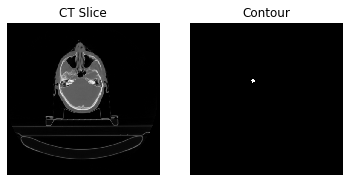

D:/HNSCC/HNSCC-01-0016\03-07-1998-RT SIMULATION-64055\1-95271\000000.dcm
D:/HNSCC/HNSCC-01-0016\03-07-1998-RT SIMULATION-64055\10-15759\
0
Skipped
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\1-05907\000000.dcm
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\10-76074\
0
Skipped
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\1-05907\000000.dcm
D:/HNSCC/HNSCC-01-0017\05-04-1998-RT SIMULATION-38793\10-76074\
0
Skipped
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\1-47218\000000.dcm
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\10-60812\
0
Skipped
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\1-47218\000000.dcm
D:/HNSCC/HNSCC-01-0018\03-01-2009-RT SIMULATION-16942\10-60812\
0
Skipped
D:/HNSCC/HNSCC-01-0019\07-04-1998-RT SIMULATION-48452\1-10361\000000.dcm
D:/HNSCC/HNSCC-01-0019\07-04-1998-RT SIMULATION-48452\5-38976\
0
Skipped
D:/HNSCC/HNSCC-01-0019\07-04-1998-RT SIMULATION-48452\1-10361\000000.dcm
D:/HNSCC/HNSCC-01-0019\07-04-1998-RT SIMULATIO

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\pydicom\filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


0
Skipped
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\1-30316\000000.dcm
D:/HNSCC/HNSCC-01-0023\08-25-1998-RT SIMULATION-38550\2-CT Atten Cor Head In-18461\
0
Skipped
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\1-07522\000000.dcm
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\71724\
0
Skipped
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\1-07522\000000.dcm
D:/HNSCC/HNSCC-01-0026\10-03-1998-RT SIMULATION-17290\71724\
0
Skipped
D:/HNSCC/HNSCC-01-0027\12-08-1998-RT SIMULATION-58016\1-05076\000000.dcm
D:/HNSCC/HNSCC-01-0027\12-08-1998-RT SIMULATION-58016\32914\
0
Skipped
D:/HNSCC/HNSCC-01-0027\12-08-1998-RT SIMULATION-58016\1-05076\000000.dcm
D:/HNSCC/HNSCC-01-0027\12-08-1998-RT SIMULATION-58016\32914\
0
Skipped
D:/HNSCC/HNSCC-01-0028\01-05-1999-RT SIMULATION-78018\1-99613\000000.dcm
D:/HNSCC/HNSCC-01-0028\01-05-1999-RT SIMULATION-78018\71467\
0
Skipped
D:/HNSCC/HNSCC-01-0028\01-05-1999-RT SIMULATION-78018\1-99613\000000.dcm
D:/HNSCC/HNSCC-01-0028\01-05-1

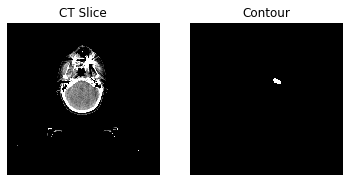

D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
0
Skipped
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\1-35823\000000.dcm
D:/HNSCC/HNSCC-01-0033\11-23-1998-RT SIMULATION-93191\24800\
0
Skipped
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\1-67951\000000.dcm
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\45777\
0
Skipped
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\1-67951\000000.dcm
D:/HNSCC/HNSCC-01-0034\12-01-1998-RT SIMULATION-45401\45777\
0
Skipped
D:/HNSCC/HNSCC-01-0035\11-23-1998-RT SIMULATION-32280\1-09328\000000.dcm
D:/HNSCC/HNSCC-01-0035\11-23-1998-RT SIMULATION-32280\3-00667\
0
Skipped
D:/HNSCC/HNSCC-01-0035\11-23-1998-RT SIMULATION-32280\1-09328\000000.dcm
D:/HNSCC/HNSCC-01-0035\11-23-1998-RT SIMULATION-32280\3-00667\
0
Skipped
D:/HNSCC/HNSCC-01-0036\01-10-1999-RT SIMULATION-06471\1-50635\000000.dcm
D:/HNSCC/HNSCC-01-0036\01-10-1999-RT SIMULATION-06471\2-776

0
Skipped
D:/HNSCC/HNSCC-01-0064\04-05-1999-RT SIMULATION-96597\1-24024\000000.dcm
D:/HNSCC/HNSCC-01-0064\04-05-1999-RT SIMULATION-96597\80352\
0
Skipped
D:/HNSCC/HNSCC-01-0065\04-07-1999-RT SIMULATION-02687\1-37087\000000.dcm
D:/HNSCC/HNSCC-01-0065\04-07-1999-RT SIMULATION-02687\3-37086\
0
Skipped
D:/HNSCC/HNSCC-01-0065\04-07-1999-RT SIMULATION-02687\1-37087\000000.dcm
D:/HNSCC/HNSCC-01-0065\04-07-1999-RT SIMULATION-02687\3-37086\
0
Skipped
D:/HNSCC/HNSCC-01-0066\04-26-1999-RT SIMULATION-95749\1-30034\000000.dcm
D:/HNSCC/HNSCC-01-0066\04-26-1999-RT SIMULATION-95749\77617\
0
Skipped
D:/HNSCC/HNSCC-01-0066\04-26-1999-RT SIMULATION-95749\1-30034\000000.dcm
D:/HNSCC/HNSCC-01-0066\04-26-1999-RT SIMULATION-95749\77617\
0
Skipped
D:/HNSCC/HNSCC-01-0067\04-20-1999-RT SIMULATION-76179\1-64967\000000.dcm
D:/HNSCC/HNSCC-01-0067\04-20-1999-RT SIMULATION-76179\7-64405\
0
Skipped
D:/HNSCC/HNSCC-01-0067\04-20-1999-RT SIMULATION-76179\1-64967\000000.dcm
D:/HNSCC/HNSCC-01-0067\04-20-1999-RT SIMULATION

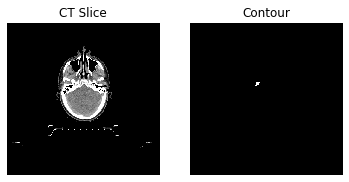

D:/HNSCC/HNSCC-01-0084\07-20-1999-RT SIMULATION-79185\1-78354\000000.dcm
D:/HNSCC/HNSCC-01-0084\07-20-1999-RT SIMULATION-79185\35958\
3
3


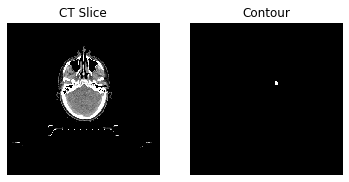

D:/HNSCC/HNSCC-01-0085\09-21-1999-RT SIMULATION-14635\1-58148\000000.dcm
D:/HNSCC/HNSCC-01-0085\09-21-1999-RT SIMULATION-14635\2-33945\
0
Skipped
D:/HNSCC/HNSCC-01-0085\09-21-1999-RT SIMULATION-14635\1-58148\000000.dcm
D:/HNSCC/HNSCC-01-0085\09-21-1999-RT SIMULATION-14635\2-33945\
0
Skipped
D:/HNSCC/HNSCC-01-0086\07-03-1999-RT SIMULATION-42088\1-14610\000000.dcm
D:/HNSCC/HNSCC-01-0086\07-03-1999-RT SIMULATION-42088\92691\
0
Skipped
D:/HNSCC/HNSCC-01-0086\07-03-1999-RT SIMULATION-42088\1-14610\000000.dcm
D:/HNSCC/HNSCC-01-0086\07-03-1999-RT SIMULATION-42088\92691\
0
Skipped
D:/HNSCC/HNSCC-01-0087\07-20-1999-RT SIMULATION-52038\1-37847\000000.dcm
D:/HNSCC/HNSCC-01-0087\07-20-1999-RT SIMULATION-52038\106-CT Atten Cor Head In-98639\
0
Skipped
D:/HNSCC/HNSCC-01-0087\07-20-1999-RT SIMULATION-52038\1-37847\000000.dcm
D:/HNSCC/HNSCC-01-0087\07-20-1999-RT SIMULATION-52038\106-CT Atten Cor Head In-98639\
0
Skipped
D:/HNSCC/HNSCC-01-0088\09-26-1999-RT SIMULATION-04047\1-34718\000000.dcm
D:/HNSCC/

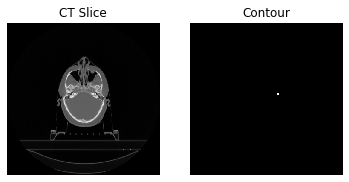

D:/HNSCC/HNSCC-01-0097\09-11-1999-RT SIMULATION-83427\1-37638\000000.dcm
D:/HNSCC/HNSCC-01-0097\09-11-1999-RT SIMULATION-83427\3-90065\
0
Skipped
D:/HNSCC/HNSCC-01-0097\09-11-1999-RT SIMULATION-83427\1-37638\000000.dcm
D:/HNSCC/HNSCC-01-0097\09-11-1999-RT SIMULATION-83427\3-90065\
0
Skipped
D:/HNSCC/HNSCC-01-0098\09-11-1999-RT SIMULATION-56812\1-66227\000000.dcm
D:/HNSCC/HNSCC-01-0098\09-11-1999-RT SIMULATION-56812\66191\
1
Skipped
D:/HNSCC/HNSCC-01-0098\09-11-1999-RT SIMULATION-56812\1-66227\000000.dcm
D:/HNSCC/HNSCC-01-0098\09-11-1999-RT SIMULATION-56812\66191\
1
Skipped
D:/HNSCC/HNSCC-01-0099\08-31-1999-RT SIMULATION-52469\1-43768\000000.dcm
D:/HNSCC/HNSCC-01-0099\08-31-1999-RT SIMULATION-52469\98751\
0
Skipped
D:/HNSCC/HNSCC-01-0099\08-31-1999-RT SIMULATION-52469\1-43768\000000.dcm
D:/HNSCC/HNSCC-01-0099\08-31-1999-RT SIMULATION-52469\98751\
0
Skipped
D:/HNSCC/HNSCC-01-0100\10-12-1999-RT SIMULATION-50847\1-86394\000000.dcm
D:/HNSCC/HNSCC-01-0100\10-12-1999-RT SIMULATION-50847\2-CT 

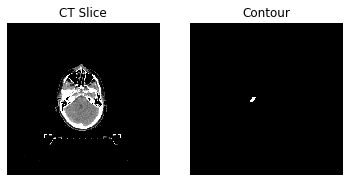

D:/HNSCC/HNSCC-01-0108\10-25-1999-RT SIMULATION-92197\1-38951\000000.dcm
D:/HNSCC/HNSCC-01-0108\10-25-1999-RT SIMULATION-92197\85293\
3
3


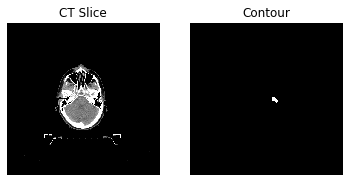

D:/HNSCC/HNSCC-01-0109\01-21-2000-RT SIMULATION-85831\1-79045\000000.dcm
D:/HNSCC/HNSCC-01-0109\01-21-2000-RT SIMULATION-85831\7-20754\
5
5


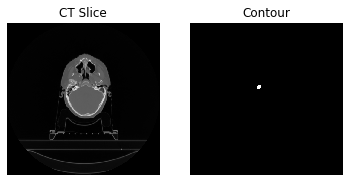

D:/HNSCC/HNSCC-01-0109\01-21-2000-RT SIMULATION-85831\1-79045\000000.dcm
D:/HNSCC/HNSCC-01-0109\01-21-2000-RT SIMULATION-85831\7-20754\
5
5


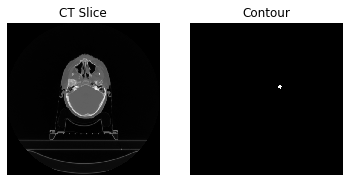

D:/HNSCC/HNSCC-01-0110\11-21-1999-RT SIMULATION-83794\1-00084\000000.dcm
D:/HNSCC/HNSCC-01-0110\11-21-1999-RT SIMULATION-83794\5-05945\
0
Skipped
D:/HNSCC/HNSCC-01-0110\11-21-1999-RT SIMULATION-83794\1-00084\000000.dcm
D:/HNSCC/HNSCC-01-0110\11-21-1999-RT SIMULATION-83794\5-05945\
0
Skipped
D:/HNSCC/HNSCC-01-0111\12-11-1999-RT SIMULATION-91734\1-16559\000000.dcm
D:/HNSCC/HNSCC-01-0111\12-11-1999-RT SIMULATION-91734\89758\
0
Skipped
D:/HNSCC/HNSCC-01-0111\12-11-1999-RT SIMULATION-91734\1-16559\000000.dcm
D:/HNSCC/HNSCC-01-0111\12-11-1999-RT SIMULATION-91734\89758\
0
Skipped
D:/HNSCC/HNSCC-01-0112\12-20-1999-RT SIMULATION-71360\1-08390\000000.dcm
D:/HNSCC/HNSCC-01-0112\12-20-1999-RT SIMULATION-71360\6-03384\
0
Skipped
D:/HNSCC/HNSCC-01-0112\12-20-1999-RT SIMULATION-71360\1-08390\000000.dcm
D:/HNSCC/HNSCC-01-0112\12-20-1999-RT SIMULATION-71360\6-03384\
0
Skipped
D:/HNSCC/HNSCC-01-0113\11-17-1999-RT SIMULATION-95795\1-70099\000000.dcm
D:/HNSCC/HNSCC-01-0113\11-17-1999-RT SIMULATION-95795\5

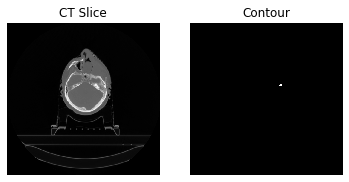

D:/HNSCC/HNSCC-01-0120\01-25-2000-RT SIMULATION-00266\1-20302\000000.dcm
D:/HNSCC/HNSCC-01-0120\01-25-2000-RT SIMULATION-00266\41937\
0
Skipped
D:/HNSCC/HNSCC-01-0120\01-25-2000-RT SIMULATION-00266\1-20302\000000.dcm
D:/HNSCC/HNSCC-01-0120\01-25-2000-RT SIMULATION-00266\41937\
0
Skipped
D:/HNSCC/HNSCC-01-0121\02-18-2000-RT SIMULATION-22192\1-03299\000000.dcm
D:/HNSCC/HNSCC-01-0121\02-18-2000-RT SIMULATION-22192\9-72904\
2
Skipped
D:/HNSCC/HNSCC-01-0121\02-18-2000-RT SIMULATION-22192\1-03299\000000.dcm
D:/HNSCC/HNSCC-01-0121\02-18-2000-RT SIMULATION-22192\9-72904\
1
Skipped
D:/HNSCC/HNSCC-01-0122\04-18-2000-RT SIMULATION-20757\1-65107\000000.dcm
D:/HNSCC/HNSCC-01-0122\04-18-2000-RT SIMULATION-20757\35795\
1
Skipped
D:/HNSCC/HNSCC-01-0122\04-18-2000-RT SIMULATION-20757\1-65107\000000.dcm
D:/HNSCC/HNSCC-01-0122\04-18-2000-RT SIMULATION-20757\35795\
1
Skipped
D:/HNSCC/HNSCC-01-0123\03-24-2000-RT SIMULATION-47852\1-18579\000000.dcm
D:/HNSCC/HNSCC-01-0123\03-24-2000-RT SIMULATION-47852\6-344

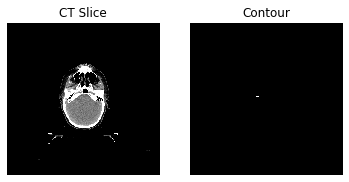

D:/HNSCC/HNSCC-01-0125\04-10-2000-RT SIMULATION-87482\1-34572\000000.dcm
D:/HNSCC/HNSCC-01-0125\04-10-2000-RT SIMULATION-87482\70855\
2
Skipped
D:/HNSCC/HNSCC-01-0126\05-16-2000-RT SIMULATION-80373\1-93266\000000.dcm
D:/HNSCC/HNSCC-01-0126\05-16-2000-RT SIMULATION-80373\3-85849\
0
Skipped
D:/HNSCC/HNSCC-01-0126\05-16-2000-RT SIMULATION-80373\1-93266\000000.dcm
D:/HNSCC/HNSCC-01-0126\05-16-2000-RT SIMULATION-80373\3-85849\
0
Skipped
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\1-90906\000000.dcm
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\4-64567\
0
Skipped
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\1-90906\000000.dcm
D:/HNSCC/HNSCC-01-0127\03-13-2000-RT SIMULATION-19879\4-64567\
0
Skipped
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\08858\
5
5


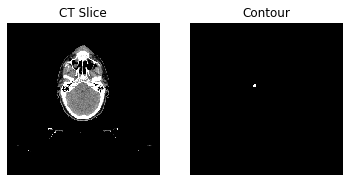

D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\1-01160\000000.dcm
D:/HNSCC/HNSCC-01-0128\04-22-2000-RT SIMULATION-72502\08858\
5
5


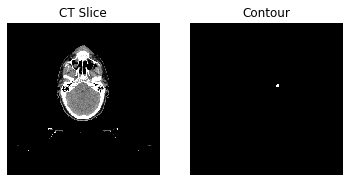

D:/HNSCC/HNSCC-01-0129\04-22-2000-RT SIMULATION-65871\1-76253\000000.dcm
D:/HNSCC/HNSCC-01-0129\04-22-2000-RT SIMULATION-65871\10-60030\
2
Skipped
D:/HNSCC/HNSCC-01-0129\04-22-2000-RT SIMULATION-65871\1-76253\000000.dcm
D:/HNSCC/HNSCC-01-0129\04-22-2000-RT SIMULATION-65871\10-60030\
0
Skipped
D:/HNSCC/HNSCC-01-0130\05-29-2000-RT SIMULATION-72920\1-32025\000000.dcm
D:/HNSCC/HNSCC-01-0130\05-29-2000-RT SIMULATION-72920\14993\
1
Skipped
D:/HNSCC/HNSCC-01-0130\05-29-2000-RT SIMULATION-72920\1-32025\000000.dcm
D:/HNSCC/HNSCC-01-0130\05-29-2000-RT SIMULATION-72920\14993\
2
Skipped
D:/HNSCC/HNSCC-01-0131\04-10-2000-RT SIMULATION-73540\1-73093\000000.dcm
D:/HNSCC/HNSCC-01-0131\04-10-2000-RT SIMULATION-73540\4-47579\
0
Skipped
D:/HNSCC/HNSCC-01-0131\04-10-2000-RT SIMULATION-73540\1-73093\000000.dcm
D:/HNSCC/HNSCC-01-0131\04-10-2000-RT SIMULATION-73540\4-47579\
0
Skipped
D:/HNSCC/HNSCC-01-0132\05-08-2000-RT SIMULATION-77276\1-02361\000000.dcm
D:/HNSCC/HNSCC-01-0132\05-08-2000-RT SIMULATION-77276

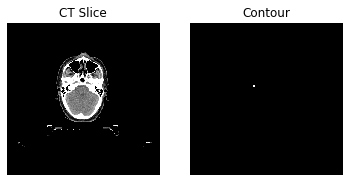

D:/HNSCC/HNSCC-01-0141\08-26-2000-RT SIMULATION-42996\1-76780\000000.dcm
D:/HNSCC/HNSCC-01-0141\08-26-2000-RT SIMULATION-42996\30232\
4
4


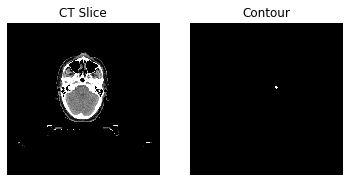

D:/HNSCC/HNSCC-01-0142\11-19-2000-RT SIMULATION-51932\1-08458\000000.dcm
D:/HNSCC/HNSCC-01-0142\11-19-2000-RT SIMULATION-51932\3-62386\
0
Skipped
D:/HNSCC/HNSCC-01-0142\11-19-2000-RT SIMULATION-51932\1-08458\000000.dcm
D:/HNSCC/HNSCC-01-0142\11-19-2000-RT SIMULATION-51932\3-62386\
0
Skipped
D:/HNSCC/HNSCC-01-0144\08-22-2000-RT SIMULATION-49341\1-48458\000000.dcm
D:/HNSCC/HNSCC-01-0144\08-22-2000-RT SIMULATION-49341\4-Recon 3 CT ATTEN HN-71448\
0
Skipped
D:/HNSCC/HNSCC-01-0144\08-22-2000-RT SIMULATION-49341\1-48458\000000.dcm
D:/HNSCC/HNSCC-01-0144\08-22-2000-RT SIMULATION-49341\4-Recon 3 CT ATTEN HN-71448\
0
Skipped
D:/HNSCC/HNSCC-01-0145\12-03-2000-RT SIMULATION-84185\1-65994\000000.dcm
D:/HNSCC/HNSCC-01-0145\12-03-2000-RT SIMULATION-84185\5-29265\
0
Skipped
D:/HNSCC/HNSCC-01-0145\12-03-2000-RT SIMULATION-84185\1-65994\000000.dcm
D:/HNSCC/HNSCC-01-0145\12-03-2000-RT SIMULATION-84185\5-29265\
0
Skipped
D:/HNSCC/HNSCC-01-0146\09-19-2000-RT SIMULATION-16208\1-681.1\000000.dcm
D:/HNSCC/HN

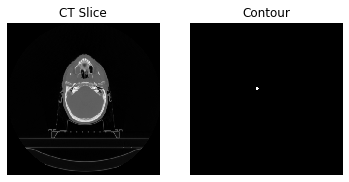

D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\1-25759\000000.dcm
D:/HNSCC/HNSCC-01-0149\10-21-2000-RT SIMULATION-61960\5-19454\
5
5


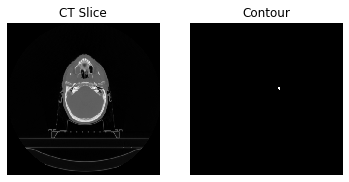

D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\1-23074\000000.dcm
D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\2-25988\
0
Skipped
D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\1-23074\000000.dcm
D:/HNSCC/HNSCC-01-0150\01-02-2001-RT SIMULATION-68230\2-25988\
0
Skipped
D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\1-38293\000000.dcm
D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\5-46393\
4
4


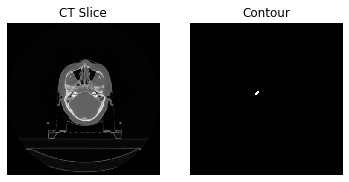

D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\1-38293\000000.dcm
D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\5-46393\
4
4


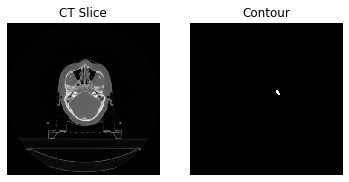

D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\1-68914\000000.dcm
D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\5-46393\
4
4


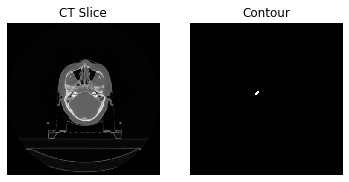

D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\1-68914\000000.dcm
D:/HNSCC/HNSCC-01-0151\12-05-2000-RT SIMULATION-79139\5-46393\
4
4


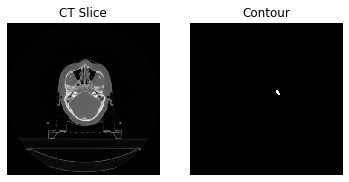

D:/HNSCC/HNSCC-01-0152\12-23-2000-RT SIMULATION-70409\1-58921\000000.dcm
D:/HNSCC/HNSCC-01-0152\12-23-2000-RT SIMULATION-70409\4-04071\
0
Skipped
D:/HNSCC/HNSCC-01-0152\12-23-2000-RT SIMULATION-70409\1-58921\000000.dcm
D:/HNSCC/HNSCC-01-0152\12-23-2000-RT SIMULATION-70409\4-04071\
0
Skipped
D:/HNSCC/HNSCC-01-0153\12-20-2000-RT SIMULATION-29315\1-08308\000000.dcm
D:/HNSCC/HNSCC-01-0153\12-20-2000-RT SIMULATION-29315\7-87868\
0
Skipped
D:/HNSCC/HNSCC-01-0153\12-20-2000-RT SIMULATION-29315\1-08308\000000.dcm
D:/HNSCC/HNSCC-01-0153\12-20-2000-RT SIMULATION-29315\7-87868\
0
Skipped
D:/HNSCC/HNSCC-01-0154\12-09-2000-RT SIMULATION-17566\1-71786\000000.dcm
D:/HNSCC/HNSCC-01-0154\12-09-2000-RT SIMULATION-17566\4-11053\
0
Skipped
D:/HNSCC/HNSCC-01-0154\12-09-2000-RT SIMULATION-17566\1-71786\000000.dcm
D:/HNSCC/HNSCC-01-0154\12-09-2000-RT SIMULATION-17566\4-11053\
0
Skipped
D:/HNSCC/HNSCC-01-0155\12-16-2000-RT SIMULATION-08232\1-57131\000000.dcm
D:/HNSCC/HNSCC-01-0155\12-16-2000-RT SIMULATION-082

2
Skipped
D:/HNSCC/HNSCC-01-0182\07-06-2002-RT SIMULATION-66174\1-54222\000000.dcm
D:/HNSCC/HNSCC-01-0182\07-06-2002-RT SIMULATION-66174\3-07990\
0
Skipped
D:/HNSCC/HNSCC-01-0182\07-06-2002-RT SIMULATION-66174\1-54222\000000.dcm
D:/HNSCC/HNSCC-01-0182\07-06-2002-RT SIMULATION-66174\3-07990\
0
Skipped
D:/HNSCC/HNSCC-01-0183\07-01-2002-RT SIMULATION-37569\1-44262\000000.dcm
D:/HNSCC/HNSCC-01-0183\07-01-2002-RT SIMULATION-37569\3-83360\
0
Skipped
D:/HNSCC/HNSCC-01-0183\07-01-2002-RT SIMULATION-37569\1-44262\000000.dcm
D:/HNSCC/HNSCC-01-0183\07-01-2002-RT SIMULATION-37569\3-83360\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\1-47142\000000.dcm
D:/HNSCC/HNSCC-01-0184\05-14-2002-RT SIMULATION-08960\5-27876\
0
Skipped
D:/HNSCC/HNSCC-01-0185\08-05-2002-RT SIMULATION-44714\1-88552\000000.dcm
D:/HNSCC/HNSCC-01-0185\08-05-2002-RT SIMU

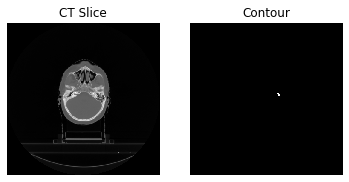

D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
2
Skipped
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\1-36606\000000.dcm
D:/HNSCC/HNSCC-01-0191\08-24-2002-RT SIMULATION-53842\3-33884\
2
Skipped
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\1-40479\000000.dcm
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\3-69873\
2
Skipped
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\1-40479\000000.dcm
D:/HNSCC/HNSCC-01-0192\07-09-2002-RT SIMULATION-18449\3-69873\
0
Skipped
D:/HNSCC/HNSCC-01-0193\09-10-2002-RT SIMULATION-54051\1-33956\000000.dcm
D:/HNSCC/HNSCC-01-0193\09-10-2002-RT SIMULATION-54051\3-04269\
0
Skipped
D:/HNSCC/HNSCC-01-0193\09-10-2002-RT SIMULATION-54051\1-33956\000000.dcm
D:/HNSCC/HNSCC-01-0193\09-10-2002-RT SIMULATION-54051\3-04269\
0
Skipped
D:/HNSCC/HNSCC-01-0194\10-22-2002-RT SIMULATION-43109\1-60885\000000.dcm
D:/HNSCC/HNSCC-01-0194\10-22-2002-RT SIMULATION-431

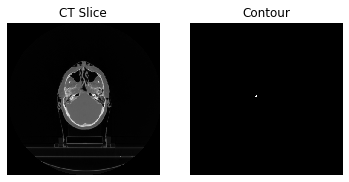

D:/HNSCC/HNSCC-01-0201\10-21-2002-RT SIMULATION-79781\1-91247\000000.dcm
D:/HNSCC/HNSCC-01-0201\10-21-2002-RT SIMULATION-79781\2-47027\
3
3


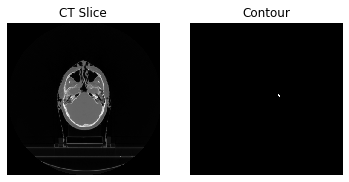

D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\
0
Skipped
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\1-23610\000000.dcm
D:/HNSCC/HNSCC-01-0202\11-18-2002-RT SIMULATION-46509\3-44538\
0
Skipped
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\1-23741\000000.dcm
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\4-83318\
1
Skipped
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\1-23741\000000.dcm
D:/HNSCC/HNSCC-01-0203\12-10-2002-RT SIMULATION-76477\4-83318\
1
Skipped
D:/HNSCC/HNSCC-01-0204\02-07-2003-RT SIMULATION-32647\1-17976\000000.dcm
D:/HNSCC/HNSCC-01-0204\02-07-2003-RT SIMULATION-32647\3-13994\
0
Skipped
D:/HNSCC/HNSCC-01-0204\02-07-2003-RT SIMULATION-32647\1-17976\000000.dcm
D:/HNSCC/HNSCC-01-0204\02-07-2003-RT SIMULATION-32647\3-13994\
0
Skipped
D:/HNSCC/HNSCC-01-0205\01-12-2003-RT SIMULATION-13458\1-96368\000000.dcm
D:/HNSCC/HNSCC-01-0205\01-12-2003-RT SIMULATION-134

In [10]:
########################## CHECK DATA HOMOGENEITY ##########################
def check_Homogeneity(pathIndex,organ, directory):
    tempArray, tempLabel =get_contoured_organ(pathIndex,organ,512)
    index = 1
    if(tempLabel!="False"):
        fig,ax = plt.subplots(1,2,figsize=[6,3])

        ax[0].imshow(tempArray[index][..., 0], cmap='gray')
        ax[0].axis('off')
        ax[0].set_title('CT Slice')
        ax[1].imshow(tempArray[index][..., 1], cmap='gray')
        ax[1].axis('off')
        ax[1].set_title('Contour')

        patient_name = structureFiles[pathIndex][9:22]
        plt.savefig(directory+patient_name+".png")
        plt.show()
        
for pathIndex in range(0,len(structureFiles)):
    check_Homogeneity(pathIndex,"Right_Cochlea", "D:\HNSCC\Datasets\Left Cochlea/")
    check_Homogeneity(pathIndex,"Left_Cochlea", "D:\HNSCC\Datasets\Right Cochlea/")

In [ ]:
########################## IMAGE PREPROCESSING ##########################
neuralNetTrainingArray = []

noOfPatients = len(structureFiles)-45
sizeImage = 512

def image_Preprocessing(pathIndex,start, end, sizeImage):
    for pathIndex in range(0,noOfPatients):
        tempArray, tempLabel =get_contoured_organ(pathIndex,"Left_Parotid",sizeImage)
        if(tempLabel!="False"):
            for i in range(0,len(tempArray)):
                neuralNetTrainingArray.append([tempArray[i],tempLabel])
            print(np.array(tempArray).shape)

        tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Parotid",sizeImage)
        if(tempLabel!="False"):
            for i in range(0,len(tempArray)):
                neuralNetTrainingArray.append([tempArray[i],tempLabel])
            print(np.array(tempArray).shape)

        tempArray, tempLabel =get_contoured_organ(pathIndex,"Brainstem",sizeImage)
        if(tempLabel!="False"):
            for i in range(0,len(tempArray)):
                neuralNetTrainingArray.append([tempArray[i],tempLabel])
            print(np.array(tempArray).shape)       
    print("Pre Shuffle")   
    random.shuffle (neuralNetTrainingArray)
    print("Training Complete")
    
    return neuralNetTrainingArray



D:/HNSCC/HNSCC-01-0064\04-05-1999-RT SIMULATION-96597\1-24024\000000.dcm
D:/HNSCC/HNSCC-01-0064\04-05-1999-RT SIMULATION-96597\80352\
22
22


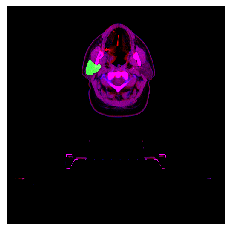

In [27]:
#################Plots for report ###########
import matplotlib.cm as cm
pathIndex = 58
tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Parotid",512)
'''
rows=3
cols =4
fig,ax = plt.subplots(rows,cols,figsize=[12,10])
z =1
for i in range(0,rows):
    for j in range(0,cols):
        z+=7
        ax[i,j].imshow(tempArray[z][...,2], cmap=cm.gray)
        ax[i,j].axis('off')

    
plt.axis('off')
#plt.savefig("CNN Sample Data Input_"+patient_name+".png")
plt.show()

pathIndex = 58
tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Parotid",512)
plt.imshow(tempArray[11])
plt.axis("off")
patient_name = structureFiles[pathIndex][9:22] 
plt.savefig("D:\HNSCC\Datasets\Bad Contour\Right Parotid/"+"Patient "+patient_name+"_RGB_NoScaling.png")
plt.show()

tempArray, tempLabel =get_contoured_organ(pathIndex,"Left_Parotid",512)
plt.imshow(tempArray[11])
plt.axis("off")
patient_name = structureFiles[pathIndex][9:22] 
plt.savefig("D:\HNSCC\Datasets\Bad Contour\Left Parotid/"+"Patient "+patient_name+"_RGB_NoScaling.png")
plt.show()
'''
patient_name = structureFiles[pathIndex][9:22]
plt.imshow(tempArray[11])
plt.axis('off')
plt.savefig("3-Channel of "+patient_name+"_Extra.png")
plt.show()

D:/HNSCC/HNSCC-01-0064\04-05-1999-RT SIMULATION-96597\1-24024\000000.dcm
D:/HNSCC/HNSCC-01-0064\04-05-1999-RT SIMULATION-96597\80352\
22
22


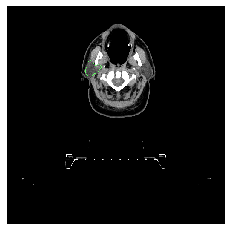

In [8]:
pathIndex = 58
tempArray, tempLabel =get_contoured_organ(pathIndex,"Right_Parotid",512)
plt.imshow(tempArray[2])
plt.axis("off")
patient_name = structureFiles[pathIndex][9:22] 

plt.show()


In [ ]:
for pathIndex in range(0,len(structureFiles)):
    check_Homogeneity(pathIndex,"Right_Parotid", "D:\HNSCC\Datasets\Right Parotid/")
    check_Homogeneity(pathIndex,"Left_Parotid", "D:\HNSCC\Datasets\Left Parotid/")
    check_Homogeneity(pathIndex,"Brainstem", "D:\HNSCC\Datasets\Brainstem/")

In [ ]:
#############################Convolutional Neural Network#########################

In [ ]:
############################# TRAINING #########################

In [ ]:
############################# CHECKS #########################
###Check for cross contamination of slices
import numpy as np
XTest = np.load('Testing_Features_2D_Middle_Slice.npy',allow_pickle=True)
yTest = np.genfromtxt('Testing_Label_2D_Middle_Slice.csv', delimiter = ',')

for i in range(0,len(XTest)):
    if((XTest[i]==XTest[51]).all()):
        print("Duplicate")


for i in range(0,len(XTest)):
    for j in range (0,len(X)):
        if((XTest[i]==X[j]).all()):
            print("Duplicate")
#Should print exactly one output

In [1]:
########################## IMAGE PREPROCESSING ##########################
stringTrainingDirectory = "C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Image Preprocessing/Training"
TrainingFeaturesDict = {"3Class2Channel3Slice":stringTrainingDirectory+"\Training_Features_2D_3Class_2Channel_3Slice.npy",
                        "3Class3Channel3Slice":stringTrainingDirectory+"\Training_Features_2D_3Class_3Channel_3Slice.npy",
                        "3ClassRGB3Slice":stringTrainingDirectory+"\Training_Features_2D_3Class_RGB_3Slice.npy",
                        "3Class2ChannelAllSlice":stringTrainingDirectory+"\Training_Features_2D_3Class_2Channel_AllSlice.npy",
                        "3Class3ChannelAllSlice":stringTrainingDirectory+"\Training_Features_2D_3Class_3Channel_AllSlice.npy",
                        "3ClassRGBAllSlice":stringTrainingDirectory+"\Testing_Features_2D_3Class_RGB_AllSlice.npy",
                      }
TrainingLabelsDict = {"3Class2Channel3Slice":stringTrainingDirectory+"\Training_Label_2D_3Class_2Channel_3Slice.csv",
                      "3Class3Channel3Slice":stringTrainingDirectory+"\Training_Label_2D_3Class_3Channel_3Slice.csv",
                      "3ClassRGB3Slice":stringTrainingDirectory+"\Training_Label_2D_3Class_RGB_3Slice.csv",
                       "3Class2ChannelAllSlice":stringTrainingDirectory+"\Training_Label_2D_3Class_2Channel_AllSlice.csv",
                       "3Class3ChannelAllSlice":stringTrainingDirectory+"\Training_Label_2D_3Class_3Channel_AllSlice.csv",
                      "3ClassRGBALLSlice":stringTrainingDirectory+"\Training_Label_2D_3Class_RGB_AllSlice.csv", 
                      }

In [2]:
################################# LOAD DATA #################################
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

#Fitting the CNN to the images
X = np.load(TrainingFeaturesDict["3ClassRGB3Slice"],allow_pickle=True) 
y = np.genfromtxt(TrainingLabelsDict["3ClassRGB3Slice"], delimiter = ',')

#Normalise data
X = tf.keras.utils.normalize(X, axis = 1) 

C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages

In [3]:
################################# BUILDING CNN #################################

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D,Conv2D

no_classes = 3

# Initialising the CNN
model = Sequential() #add each layer in turn

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second Convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening for Dense Layer
model.add(Flatten())

# Full Connected "Dense" Layer
model.add(Dense(units = 128, activation = 'relu'))

#Output Layer
model.add(Dense(units = no_classes, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())


#from tensorflow.keras.layers import Dropout #might need to prevent overfitting? 
#from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
#import time

#Useful Callbacks:
#Tensorboard slows it down but creates plots that can check for overfitting
#tensorboard = TensorBoard(log_dir='logs\ %4i'%int(time.time()))

#Saves model after each epoch
#filepath = "D:/HNSCC/Programs/CNN_EPOCHS"
#checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

#callbacks_list = [tensorboard]#checkpoint,


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               130056320 
_________________________________________________________________
dens

In [4]:
################################# TRAINING CNN #################################

#Simple learning Treatment:
#Had to decrease batch size otherwise I get a memory error
history = model.fit(X,y,batch_size = 16, epochs = 6, validation_split=0.1)

#,callbacks=callbacks_list)

Train on 1000 samples, validate on 112 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
1000/1000 [==============================] - 644s 644ms/sample - loss: 1.1694 - acc: 0.3450 - val_loss: 1.0813 - val_acc: 0.4643
Epoch 2/6
1000/1000 [==============================] - 629s 629ms/sample - loss: 0.9127 - acc: 0.5110 - val_loss: 0.8764 - val_acc: 0.5089
Epoch 3/6
1000/1000 [==============================] - 633s 633ms/sample - loss: 0.6666 - acc: 0.6370 - val_loss: 0.8368 - val_acc: 0.5446
Epoch 4/6
1000/1000 [==============================] - 642s 642ms/sample - loss: 0.5391 - acc: 0.7090 - val_loss: 0.7480 - val_acc: 0.5446
Epoch 5/6
1000/1000 [==============================] - 627s 627ms/sample - loss: 0.5044 - acc: 0.7220 - val_loss: 0.8318 - val_acc: 0.5089
Epoch 6/6
1000/1000 [==============================] - 637s 637ms/sample - loss: 0.4123 - acc: 0.8030 - val_loss: 0.5789 - val_acc: 0.7232


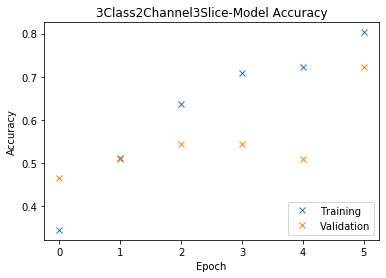

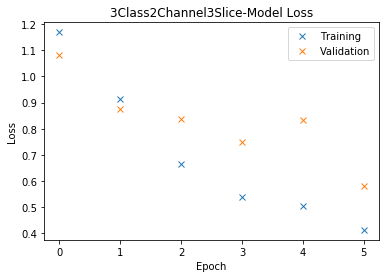

In [6]:
stringImageDirectory ="C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Images/"
stringModelDirectory = "C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Models"
ModelDict = {"3Class2Channel3Slice":stringModelDirectory+"/2D_3Class_2Channel_3Slice_Model", 
             "3Class3Channel3Slice":stringModelDirectory+"/2D_3Class_3Channel_3Slice_Model",  
             "3ClassRGB3Slice":stringModelDirectory+"/2D_3Class_RGB_3Slice_Model",
             }

#Save model
model.save(ModelDict["3ClassRGB3Slice"]+"_Epoch6.model")

# Plot training & validation accuracy values
plt.plot(history.history['acc'],'x')
plt.plot(history.history['val_acc'],'x')
plt.title("3Class2Channel3Slice"+'-Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.savefig(ModelDict["3ClassRGB3Slice"]+"_Epoch6"+"_Accuracy.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x')
plt.plot(history.history['val_loss'],'x')
plt.title("3Class2Channel3Slice"+'-Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.savefig(ModelDict["3ClassRGB3Slice"]+"_Epoch6"+"_Loss.png")
plt.show()

In [ ]:
############################# PREDICTING #########################

In [1]:
########################## IMAGE PREPROCESSING ##########################
stringTestingDirectory = "C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Image Preprocessing/Testing"

TestingFeaturesDict = {"3Class2Channel3Slice":stringTestingDirectory+"\Testing_Features_2D_3Class_2Channel_3Slice.npy",
                       "3Class3Channel3Slice":stringTestingDirectory+"\Testing_Features_2D_3Class_3Channel_3Slice.npy",
                       "3ClassRGB3Slice":stringTestingDirectory+"\Testing_Features_2D_3Class_RGB_3Slice.npy",
                       "3Class2ChannelAllSlice":stringTestingDirectory+"\Testing_Features_2D_3Class_2Channel_AllSlice.npy",
                       "3Class3ChannelAllSlice":stringTestingDirectory+"\Testing_Features_2D_3Class_3Channel_AllSlice.npy",
                       "3ClassRGBAllSlice":stringTestingDirectory+"\Testing_Features_2D_3Class_RGB_AllSlice.npy",
                      }

TestingLabelsDict = {"3Class2Channel3Slice":stringTestingDirectory+"\Testing_Label_2D_3Class_2Channel_3Slice.csv",
                     "3Class3Channel3Slice":stringTestingDirectory+"\Testing_Label_2D_3Class_3Channel_3Slice.csv",
                     "3ClassRGB3Slice":stringTestingDirectory+"\Testing_Label_2D_3Class_RGB_3Slice.csv",
                     "3Class2ChannelAllSlice":stringTestingDirectory+"\Testing_Label_2D_3Class_2Channel_AllSlice.csv",
                     "3Class3ChannelAllSlice":stringTestingDirectory+"\Testing_Label_2D_3Class_3Channel_AllSlice.csv",
                     "3ClassRGBAllSlice":stringTestingDirectory+"\Testing_Features_2D_3Class_RGB_AllSlice.csv",
                      }
stringModelDirectory = "C:/Users/Oliver/Documents/University/Year 4/MPhys Project/Models"
ModelDict = {"3Class2Channel3Slice":stringModelDirectory+"/2D_3Class_2Channel_3Slice_Model", 
             "3Class3Channel3Slice":stringModelDirectory+"/2D_3Class_3Channel_3Slice_Model",  
             "3ClassRGB3Slice":stringModelDirectory+"/2D_3Class_RGB_3Slice_Model",
             }


In [2]:
################################# LOAD MODEL #################################
from keras.preprocessing import image
import tensorflow as tf
new_model = tf.keras.models.load_model(ModelDict["3ClassRGB3Slice"]+"_Epoch6.model")
################################# LOAD DATA #################################
import numpy as np

#Fitting the CNN to the images
XTest = np.load(TestingFeaturesDict["3ClassRGB3Slice"],allow_pickle=True)
yTest = np.genfromtxt(TestingLabelsDict["3ClassRGB3Slice"], delimiter = ',')

Using TensorFlow backend.
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Oliver\Anaconda3\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Oliver\Anaconda3\envs\P

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
################################# ASSESSING MODEL FOR NEW PREDICTIONS #################################
val_loss, val_acc = new_model.evaluate(XTest,yTest)

print("Inital Model evaluation:")
print("Validation Loss: %2.2f"%val_loss)
print("Validation Accuracy: %2.2f"%val_acc)

225/225 [==============================] - 40s 180ms/sample - loss: 1.1921e-07 - acc: 1.0000
Inital Model evaluation:
Validation Loss: 0.00
Validation Accuracy: 1.00


In [5]:
################################# PREDICTING NEW DATASETS #################################

prediction = []

TrueRightParotids = 0
FalseRightParotids = 0
TrueLeftParotids = 0
FalseLeftParotids= 0
TrueBrainstem = 0
FalseBrainstem = 0


NoOfRightParotids = 0 
NoOfRightParotidsPredicted = 0 
NoOfLeftParotids = 0 
NoOfLeftParotidsPredicted = 0 
NoOfBrainstems = 0 
NoOfBrainstemsPredicted = 0 

PredictedRightTrueBrainstem =0
PredictedRightTrueLeft=0
PredictedLeftTrueBrainstem =0
PredictedLeftTrueRight=0
PredictedBrainstemTrueRight =0
PredictedBrainstemTrueLeft=0


for i in range(0,len(XTest)):
    
    test_image = np.expand_dims(XTest[i], axis = 0)
    result = new_model.predict(test_image)
    
    if (yTest[i][0] ==1):
        print('Right Parotid')
        NoOfRightParotids+=1
    if(yTest[i][1] ==1):
        print('Left Parotid')
        NoOfLeftParotids+=1
    if(yTest[i][2] ==1):
        print('Brainstem')
        NoOfBrainstems+=1   
    
    print(yTest[i])
    resultindex = np.argmax(result) 
    testIndex = np.argmax(yTest[i]) 
    
    if (resultindex == 0):
        print('Predicted == Right Parotid')
        NoOfRightParotidsPredicted +=1
               
        if (resultindex == testIndex):
            TrueRightParotids+=1
        else:
            if(yTest[i][1] ==1):
                PredictedRightTrueLeft+=1
            else:
                PredictedRightTrueBrainstem +=1
            FalseRightParotids+=1
    elif (resultindex == 1):
        print('Predicted == Left Parotid')
        NoOfLeftParotidsPredicted +=1
        
        if (resultindex == testIndex):
            TrueLeftParotids+=1
        else:
            if (yTest[i][0] ==1):
                PredictedLeftTrueRight+=1
            else:
                PredictedLeftTrueBrainstem +=1
            
            FalseLeftParotids+=1
    elif (resultindex == 2):
        print('Predicted == Bainstem')
        NoOfBrainstemsPredicted +=1
        
        if (resultindex == testIndex):
            TrueBrainstem+=1
        else:
            if (yTest[i][0] ==1):
                PredictedBrainstemTrueRight+=1
            else:
                PredictedBrainstemTrueLeft+=1
            FalseBrainstem+=1
    print(result) 
    print("\n")

print("\n\n")    
print("No. of true right parotids: %3i, no. of true left parotids: %3i and no. of true brainstems: %3i"%(TrueRightParotids,TrueLeftParotids,TrueBrainstem))
print("No. of false right parotids: %3i, no. of false left parotids: %3i and no. of false brainstems:%3i"%(FalseRightParotids,FalseLeftParotids,FalseBrainstem))
print("\n\n")  

print("Predicted Right Actual: Brainstem: %3i, Left: %3i"%(PredictedRightTrueBrainstem,PredictedRightTrueLeft))
print("Predicted Left Actual: Brainstem: %3i, Right: %3i"%(PredictedLeftTrueBrainstem,PredictedLeftTrueRight))
print("Predicted Brainstem Actual: Right: %3i, Left: %3i"%(PredictedBrainstemTrueRight,PredictedBrainstemTrueLeft))
print("\n\n")  

print("No. of right parotids: %3i and no. predicted: %3i"%(NoOfRightParotids,NoOfRightParotidsPredicted))
print("No. of left parotids: %3i and no. predicted: %3i"%(NoOfLeftParotids,NoOfLeftParotidsPredicted))
print("No. of brainstems: %3i and no. predicted: %3i"%(NoOfBrainstems,NoOfBrainstemsPredicted))


Brainstem
[0. 0. 1.]
Predicted == Right Parotid
[[1. 0. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Bainstem
[[0. 0. 1.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Right Parotid
[[1. 0. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Right Parotid
[[1. 0. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Bainstem
[[0. 0. 1.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Bainstem
[[0. 0. 1.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == R

Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1.0000000e+00 1.0551763e-36 0.0000000e+00]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Bainstem
[[0. 0. 1.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Bainstem
[[0. 0. 1.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Bainstem
[[0. 0. 1.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Left Parotid
[0. 1. 0.]
Predicted == Left Parotid
[[0. 1. 0.]]


Brainstem
[0. 0. 1.]
Predicted == Bainstem
[[0. 0. 1.]]


Right Parotid
[1. 0. 0.]
Predicted == Right Parotid
[[1. 0. 0.]]


Left Parot

In [ ]:
#################################LOAD TENSORBOARD#################################

%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
%reload_ext tensorboard

In [ ]:
!kill 32640

In [ ]:
#########~~~~~~~~~~~~~~~~~~~???????OLD CODE FOR LATER???????~~~~~~~~~~~~~~~~~~~#########

In [ ]:
################################# IN DEPTH BUILDING CNN #################################

import tensorflow as tf

no_classes = 3
batch_size = 16
im_shape =512
#keep_rate = 0.8
keep_prob = tf.placeholder(tf.float32)

def conv2d(X, W):
    return tf.nn.conv2d(X, W, strides=[1,1,1,1], padding='SAME')

def maxpool2d(X):
    #                        size of window         movement of window
    return tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')



def convolutional_neural_network(X):
    flattern_shape = 126*126*64
    #Initialise weigths and biases
    
    weights = {'W_conv1':tf.Variable(tf.random_normal([3,3,1,32])), #convolution window [3,3], input 1, filters 32
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_dense':tf.Variable(tf.random_normal([flattern_shape,128])),
               'out':tf.Variable(tf.random_normal([128, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_dense':tf.Variable(tf.random_normal([128])),
               'out':tf.Variable(tf.random_normal([n_classes]))}
    
    #Initialise layers
    conv1 = tf.nn.relu(conv2d(X, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)
    
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)
    
    dense = tf.reshape(conv2,[-1, flattern_shape])
    dense = tf.nn.relu(tf.matmul(dense, weights['W_dense'])+biases['b_dense'])
    #dense = tf.nn.dropout(dense, keep_rate)
    
    #Multiply matrices
    output = tf.matmul(dense, weights['out'])+biases['out']

    return output

def train_neural_network(X):
    prediction = convolutional_neural_network(X)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    network_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        successful_runs = 0
        total_runs = 0
        
        for i in range(0, len(X)):
            total_runs += 1
            try:
                epoch_loss = 0
                _, c = sess.run([optimizer, cost], feed_dict={x: X[i], y: Y[i]})
                epoch_loss += c
                successful_run += 1
            except Exception as e:
                print(str(e))
                #pass

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X, y:y}))

train_neural_network(X)

In [ ]:
############################### LOAD PAROTID CONTOURS ##########################
RTparotidContours = np.load(structureFiles[0][0:23]+"Right_Contour_Parotids.npy", allow_pickle=True)
LTparotidContours = np.load(structureFiles[0][0:23]+"Left_Contour_Parotids.npy", allow_pickle=True)
xcoordinates = []
ycoordinates = []
zcoordinates = []

for z in range (0,len(LTparotidContours) ):
    for i in range(0, len(RTparotidContours[z])):
        #print ("loop i = %2i, loop z = %2i"%(i,z))
        xcoordinates.append(RTparotidContours[z][i][0])
        ycoordinates.append(RTparotidContours[z][i][1])
        zcoordinates.append(RTparotidContours[z][i][2])
    for i in range(0, len(LTparotidContours[z])):   
        xcoordinates.append(LTparotidContours[z][i][0])
        ycoordinates.append(LTparotidContours[z][i][1])
        zcoordinates.append(LTparotidContours[z][i][2])

In [ ]:
############################### PLOT PAROTID CONTOURS ##########################

import plotly.graph_objects as go
#from plotly.offline.iplot as py



fig = go.Figure(data=[go.Scatter3d(x=xcoordinates, y=ycoordinates, z=zcoordinates, mode='markers', marker=dict( size=2,
        color=zcoordinates,# sets direction of colour gradient
        colorscale='Viridis', opacity=0.8))])

#url=py.iplot(fig, filename='your_filename')
#fig.save("3D Contour")
#fig.write_image("3D Contour.png")
#fig.show(renderer="png")
fig.show()
